In [1]:
pip install torch torchvision matplotlib

Note: you may need to restart the kernel to use updated packages.


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9912422/9912422 [00:00<00:00, 12799256.98it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28881/28881 [00:00<00:00, 656864.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:02<00:00, 768729.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<00:00, 3140542.16it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Train Loss: 0.2999, Test Loss: 0.1494
Epoch [2/10], Train Loss: 0.1890, Test Loss: 0.1093
Epoch [3/10], Train Loss: 0.1624, Test Loss: 0.1020
Epoch [4/10], Train Loss: 0.1490, Test Loss: 0.0975
Epoch [5/10], Train Loss: 0.1368, Test Loss: 0.0984
Epoch [6/10], Train Loss: 0.1312, Test Loss: 0.0905
Epoch [7/10], Train Loss: 0.1218, Test Loss: 0.0841
Epoch [8/10], Train Loss: 0.1194, Test Loss: 0.0906
Epoch [9/10], Train Loss: 0.1106, Test Loss: 0.0749
Epoch [10/10], Train Loss: 0.1064, Test Loss: 0.0828


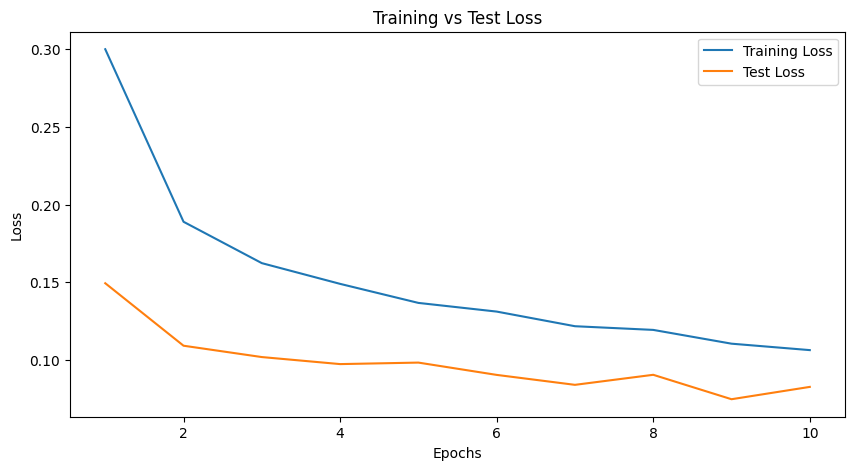

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Hyperparameters
input_size = 28 * 28  # MNIST image size (flattened)
hidden_size = 256
num_classes = 10  # Digits 0-9
num_epochs = 10
batch_size = 64
learning_rate = 0.001
dropout_prob = 0.5

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Fully Connected Neural Network with BatchNorm and Dropout
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_prob):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.batch_norm(x)  # Apply batch normalization
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = FNN(input_size, hidden_size, num_classes, dropout_prob)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)

    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data, targets in test_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    
    test_loss /= len(test_loader)
    test_loss_list.append(test_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the training and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_loss_list, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Test Loss')
plt.show()
